In [22]:
print('Linear Regression Project')

Linear Regression Project


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols # Linear Regression

In [33]:
ad_conversions = pd.read_csv('ad_conversion.csv')
ad_conversions.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


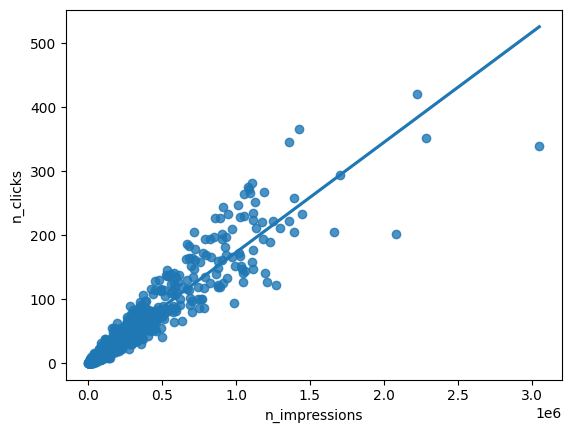

In [25]:
sns.regplot(data=ad_conversions,x='n_impressions',y='n_clicks',ci=None)
plt.show()

In [34]:
ad_conversions['qdrt_n_impressions'] = ad_conversions['n_impressions'] ** 0.25
ad_conversions['qdrt_n_clicks'] = ad_conversions['n_clicks'] ** 0.25

ad_conversions.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


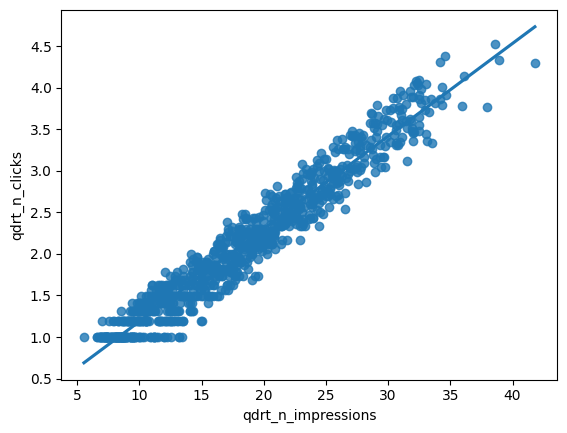

In [35]:
sns.regplot(data=ad_conversions,x='qdrt_n_impressions',y='qdrt_n_clicks',ci=None)
plt.show()

In [36]:
mdl_click_vs_impressions = ols('qdrt_n_clicks ~ qdrt_n_impressions',data=ad_conversions).fit()
print(mdl_click_vs_impressions.params)

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [37]:
explanatory_data = pd.DataFrame({'qdrt_n_impressions' : np.arange(0,3000001,500000) ** 0.25,
                                 'n_impressions':np.arange(0,3000001,500000)})

print(explanatory_data)


   qdrt_n_impressions  n_impressions
0            0.000000              0
1           26.591479         500000
2           31.622777        1000000
3           34.996355        1500000
4           37.606031        2000000
5           39.763536        2500000
6           41.617915        3000000


In [38]:
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impressions.predict(explanatory_data)
)

print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000              0       0.071748
1           26.591479         500000       3.037576
2           31.622777        1000000       3.598732
3           34.996355        1500000       3.974998
4           37.606031        2000000       4.266063
5           39.763536        2500000       4.506696
6           41.617915        3000000       4.713520


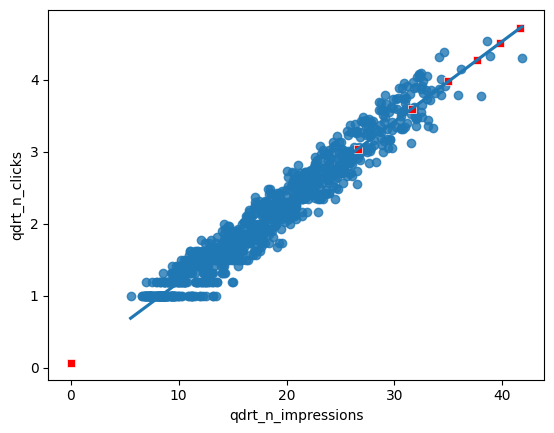

In [39]:
plt.Figure
sns.regplot(data=ad_conversions,x='qdrt_n_impressions',y='qdrt_n_clicks',ci=None)
sns.scatterplot(data=prediction_data,x='qdrt_n_impressions',y='qdrt_n_clicks',color='red',marker='s')
plt.show()

In [40]:
prediction_data['n_clicks'] = prediction_data['qdrt_n_clicks'] ** 4
prediction_data.head()

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0,0.071748,0.000026
1,26.591479,500000,3.037576,85.135121
2,31.622777,1000000,3.598732,167.725102
3,34.996355,1500000,3.974998,249.659131
4,37.606031,2000000,4.266063,331.214159


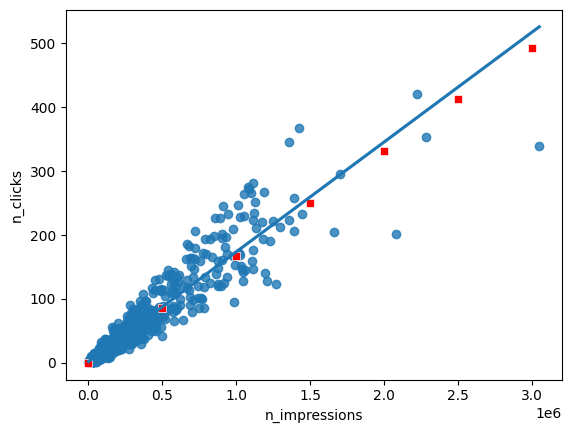

In [41]:
plt.Figure
sns.regplot(data=ad_conversions,x='n_impressions',y='n_clicks',ci=None)
sns.scatterplot(data=prediction_data,x='n_impressions',y='n_clicks',color='red',marker='s')
plt.show()

In [43]:
mse = mdl_click_vs_impressions.mse_resid
print('MSE:' + str(mse))

rse = np.sqrt(mse)
print('RSE: ' + str(rse))

MSE:0.03877213389297149
RSE: 0.19690640896875725
